# Summary Statistics

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from imblearn.over_sampling import SMOTE
from collections import Counter


file_path = '/Users/rakibul/Desktop/Machine Learning/VBD/Vector-Borne-Diseases/dataset.csv'
data = pd.read_csv(file_path)

#### for symptoms


Summary Statistics for Symptoms:
       sudden_fever    headache  mouth_bleed  nose_bleed  muscle_pain  \
count    707.000000  707.000000   707.000000  707.000000   707.000000   
mean       0.503536    0.449788     0.459689    0.487977     0.517680   
std        0.500341    0.497825     0.498725    0.500209     0.500041   
min        0.000000    0.000000     0.000000    0.000000     0.000000   
25%        0.000000    0.000000     0.000000    0.000000     0.000000   
50%        1.000000    0.000000     0.000000    0.000000     1.000000   
75%        1.000000    1.000000     1.000000    1.000000     1.000000   
max        1.000000    1.000000     1.000000    1.000000     1.000000   

       joint_pain    vomiting        rash    diarrhea  hypotension  ...  \
count  707.000000  707.000000  707.000000  707.000000   707.000000  ...   
mean     0.449788    0.441301    0.487977    0.390382     0.393211  ...   
std      0.497825    0.496894    0.500209    0.488181     0.488809  ...   
min     

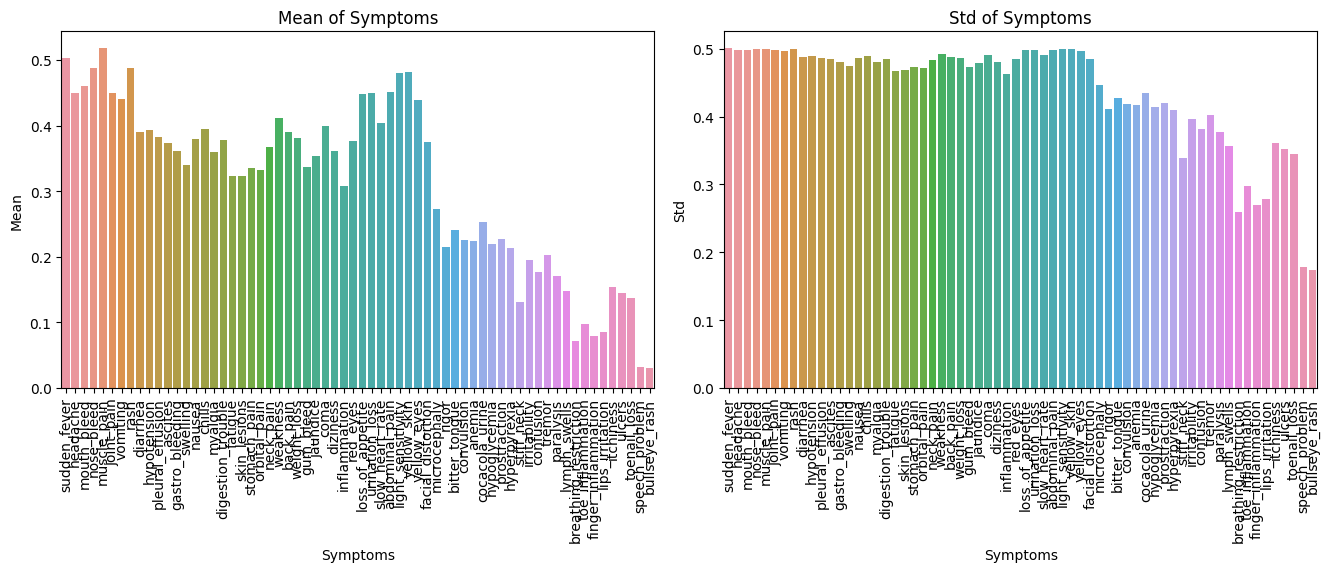

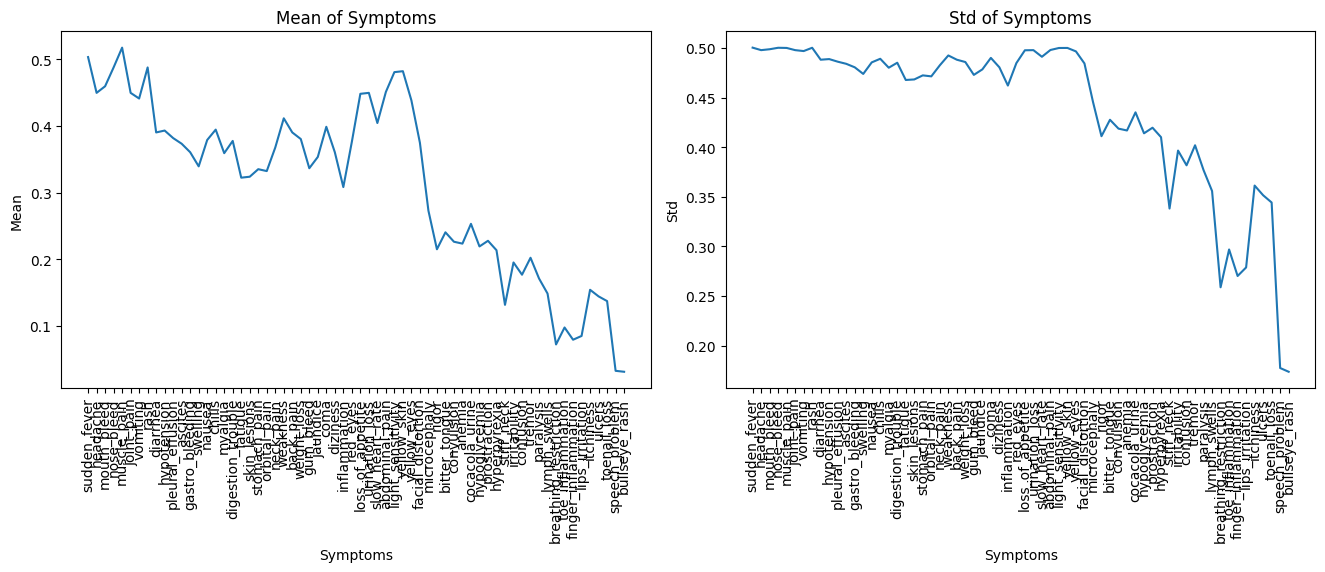

In [2]:
# Calculate summary statistics for symptoms
symptoms_summary = data.drop(columns=['id', 'prognosis']).describe()

# Print summary statistics for symptoms
print("\nSummary Statistics for Symptoms:")
print(symptoms_summary)

# Prepare the data for visualization
summary_stats = symptoms_summary.loc[['mean', 'std']].T

# List of statistics to plot
stats_to_plot = ['mean', 'std']

# Plot each statistic in a separate subplot within a grid layout
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.flatten()

for i, stat in enumerate(stats_to_plot):
    sns.barplot(x=summary_stats.index, y=summary_stats[stat], ax=axs[i])
    axs[i].set_title(f'{stat.capitalize()} of Symptoms')
    axs[i].set_ylabel(stat.capitalize())
    axs[i].set_xlabel('Symptoms')
    axs[i].tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(len(stats_to_plot), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

# Plot each statistic in a separate subplot within a linegraph layout
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.flatten()

for i, stat in enumerate(stats_to_plot):
    
    sns.lineplot(x=summary_stats.index, y=summary_stats[stat], ax=axs[i])
    axs[i].set_title(f'{stat.capitalize()} of Symptoms')
    axs[i].set_ylabel(stat.capitalize())
    axs[i].set_xlabel('Symptoms')
    axs[i].tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(len(stats_to_plot), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

#### for diseases

In [3]:
# Calculate summary statistics for diseases
diseases_summary = data.groupby('prognosis').describe()

# Print summary statistics for diseases
print("\nSummary Statistics for Diseases:")
print(diseases_summary)


Summary Statistics for Diseases:
                         id                                               \
                      count        mean         std   min     25%    50%   
prognosis                                                                  
Chikungunya            66.0  349.121212  210.599402   9.0  161.00  372.5   
Dengue                 63.0  353.285714  199.174460  12.0  157.00  364.0   
Japanese_encephalitis  81.0  339.296296  196.252926  25.0  191.00  305.0   
Lyme_disease           52.0  344.846154  218.890373   0.0  155.00  376.0   
Malaria                48.0  342.604167  208.643006   8.0  156.00  304.5   
Plague                 53.0  363.150943  215.169915  10.0  158.00  383.0   
Rift_Valley_fever      70.0  378.485714  185.148647   4.0  241.50  359.5   
Tungiasis              70.0  365.771429  212.938255   1.0  198.75  384.5   
West_Nile_fever        85.0  352.929412  209.799666   6.0  165.00  336.0   
Yellow_Fever           61.0  358.786885  198.593145  1

# Symptom Distribution

In [4]:
# Calculate symptom distribution
symptom_distribution = data.drop(columns=['id', 'prognosis']).sum().sort_values(ascending=False)

# Print symptom distribution
print("Symptom Distribution:")
print(symptom_distribution)


Symptom Distribution:
muscle_pain              366.0
sudden_fever             356.0
nose_bleed               345.0
rash                     345.0
yellow_skin              341.0
                         ...  
lips_irritation           60.0
finger_inflammation       56.0
breathing_restriction     51.0
speech_problem            23.0
bullseye_rash             22.0
Length: 64, dtype: float64


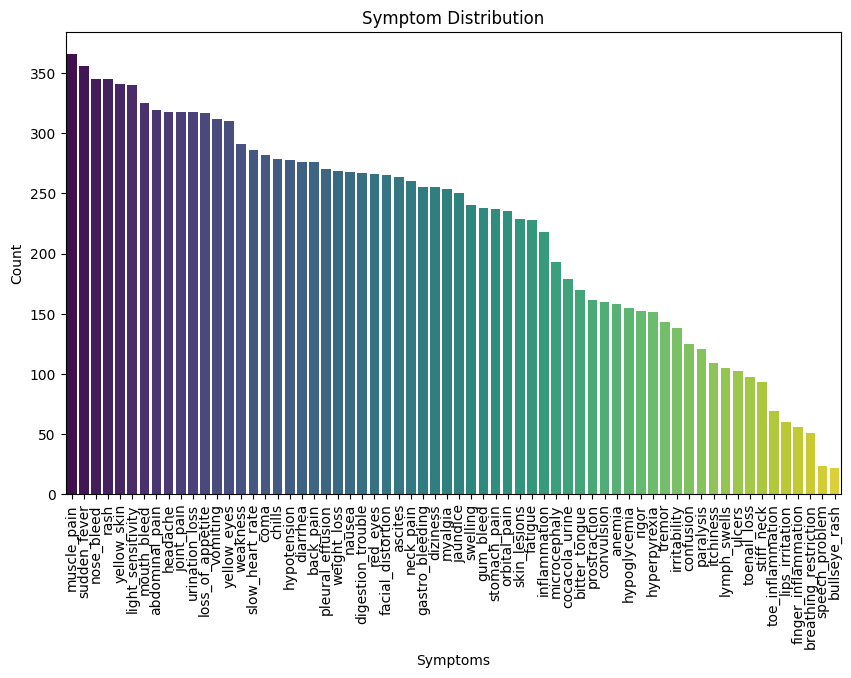

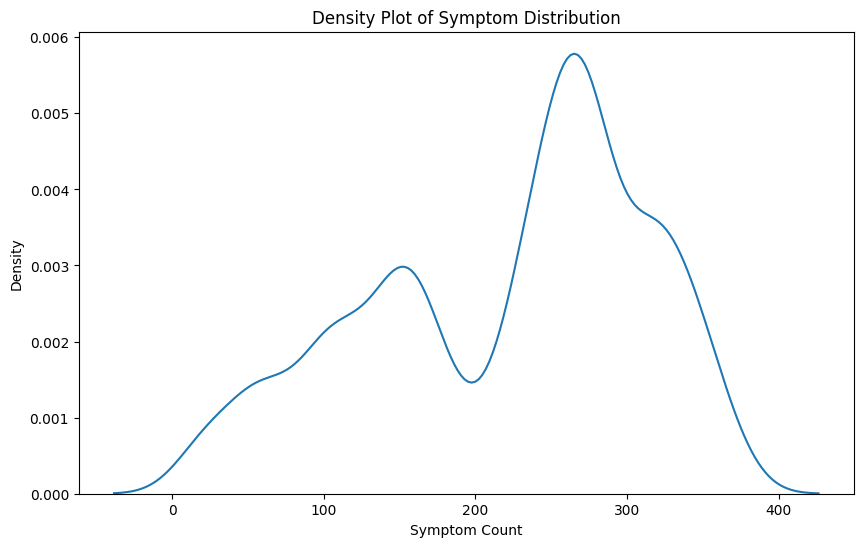

In [5]:
# Visualize symptom distribution            

# Convert the symptom distribution to a DataFrame for easier plotting
symptom_distribution_df = symptom_distribution.reset_index()
symptom_distribution_df.columns = ['Symptom', 'Count']

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Symptom', y='Count', data=symptom_distribution_df, palette='viridis')
plt.xticks(rotation=90)
plt.title('Symptom Distribution')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.show()

# KDE plot (if desired)
plt.figure(figsize=(10, 6))
sns.kdeplot(symptom_distribution, bw_adjust=0.5)
plt.title('Density Plot of Symptom Distribution')
plt.xlabel('Symptom Count')
plt.ylabel('Density')
plt.show()


# Disease Distribution

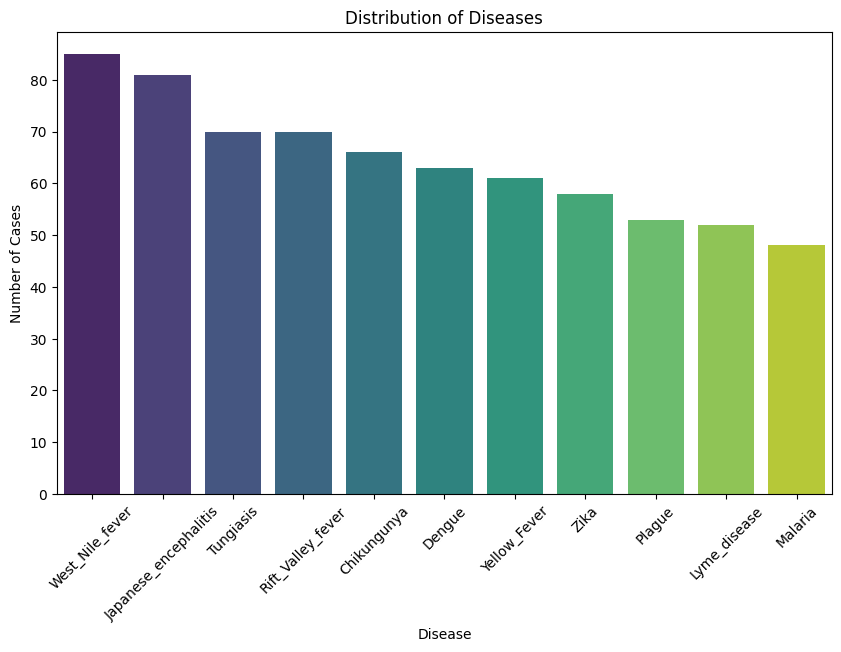

Total number of cases: 707
Most common diseases:
                 Disease  Number of Cases
0        West_Nile_fever               85
1  Japanese_encephalitis               81
2              Tungiasis               70
3      Rift_Valley_fever               70
4            Chikungunya               66


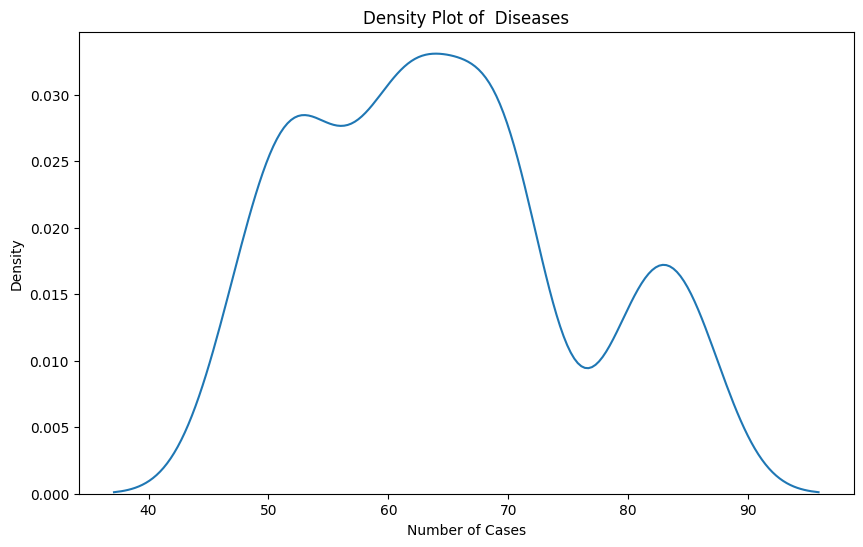

In [6]:
# Count the occurrences of each disease
disease_counts = data['prognosis'].value_counts().reset_index()
disease_counts.columns = ['Disease', 'Number of Cases']

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Disease', y='Number of Cases', data=disease_counts, palette='viridis')
plt.title('Distribution of Diseases')
plt.xlabel('Disease')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

# Print summary statistics
print("Total number of cases:", len(data))
print("Most common diseases:")
print(disease_counts.head())

# KDE plot (if desired)
disease_data = data['prognosis'].value_counts().values
plt.figure(figsize=(10, 6))
sns.kdeplot(disease_data, bw_adjust=0.5)
plt.title('Density Plot of  Diseases')
plt.xlabel('Number of Cases')
plt.ylabel('Density')
plt.show()


# Symptom Co-occurrence

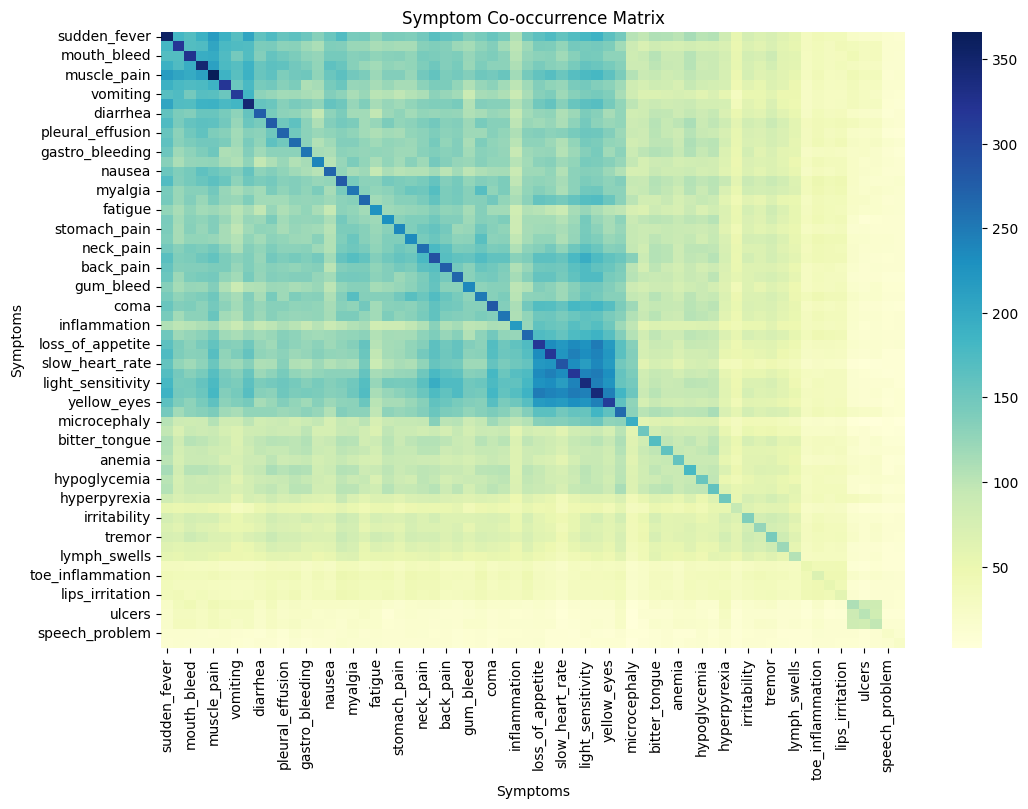

In [7]:
# Select only symptom columns
symptoms = data.drop(['id', 'prognosis'], axis=1)

# Calculate symptom co-occurrence matrix
co_occurrence_matrix = symptoms.T.dot(symptoms)

# Visualize the co-occurrence matrix
plt.figure(figsize=(12, 8))
sns.heatmap(co_occurrence_matrix, cmap="YlGnBu")
plt.title('Symptom Co-occurrence Matrix')
plt.xlabel('Symptoms')
plt.ylabel('Symptoms')
plt.show()

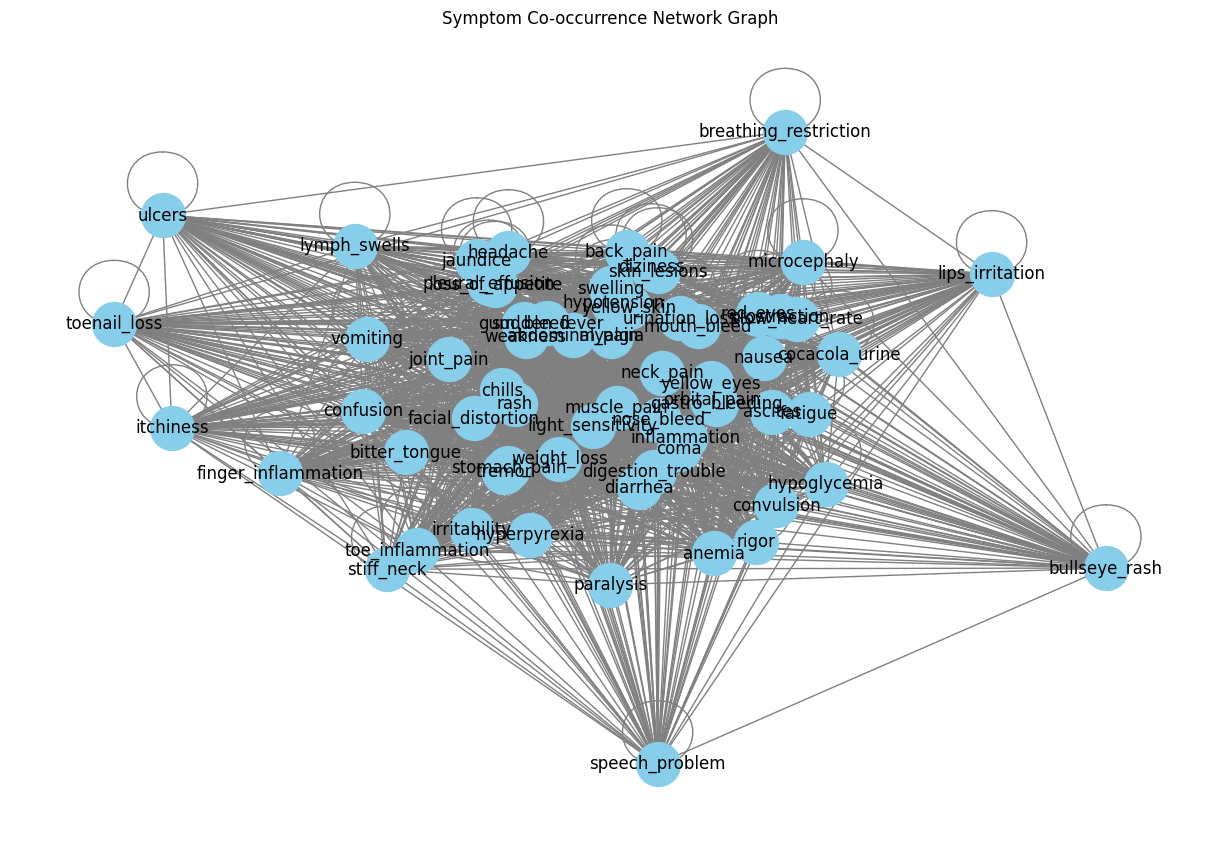

In [8]:
# Network Graph

G = nx.from_pandas_adjacency(co_occurrence_matrix)
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray')
plt.title('Symptom Co-occurrence Network Graph')
plt.show()

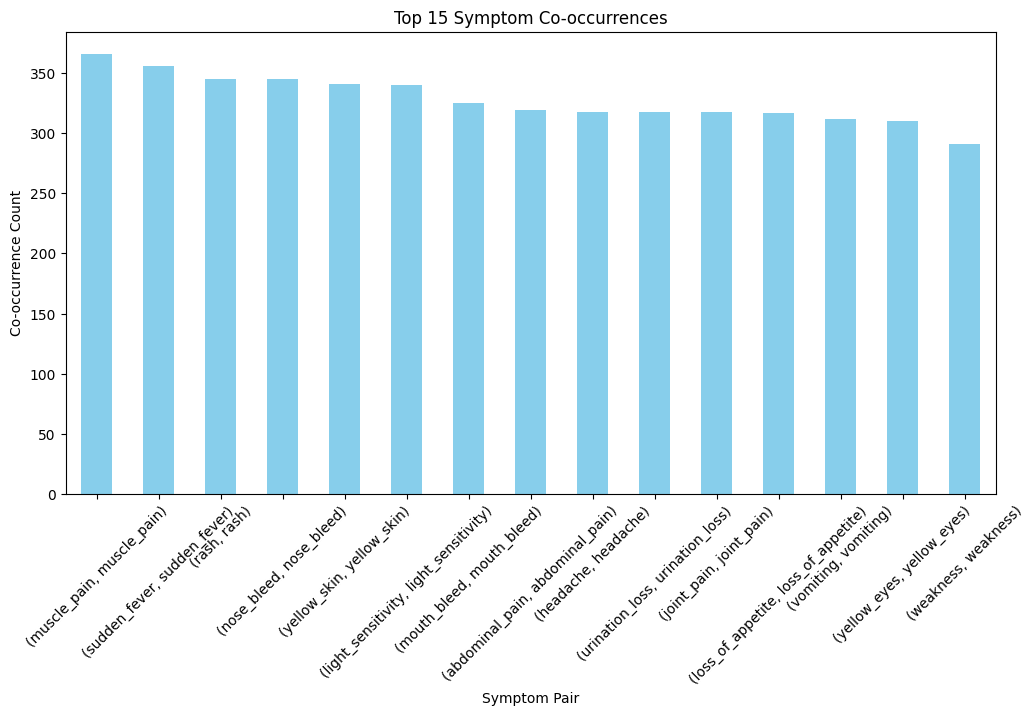

In [9]:
# Bar plot of most common symptom co-occurrences
plt.figure(figsize=(12, 6))
co_occurrence_matrix.unstack().sort_values(ascending=False).head(15).plot(kind='bar', color='skyblue')
plt.title('Top 15 Symptom Co-occurrences')
plt.xlabel('Symptom Pair')
plt.ylabel('Co-occurrence Count')
plt.xticks(rotation=45)
plt.show()

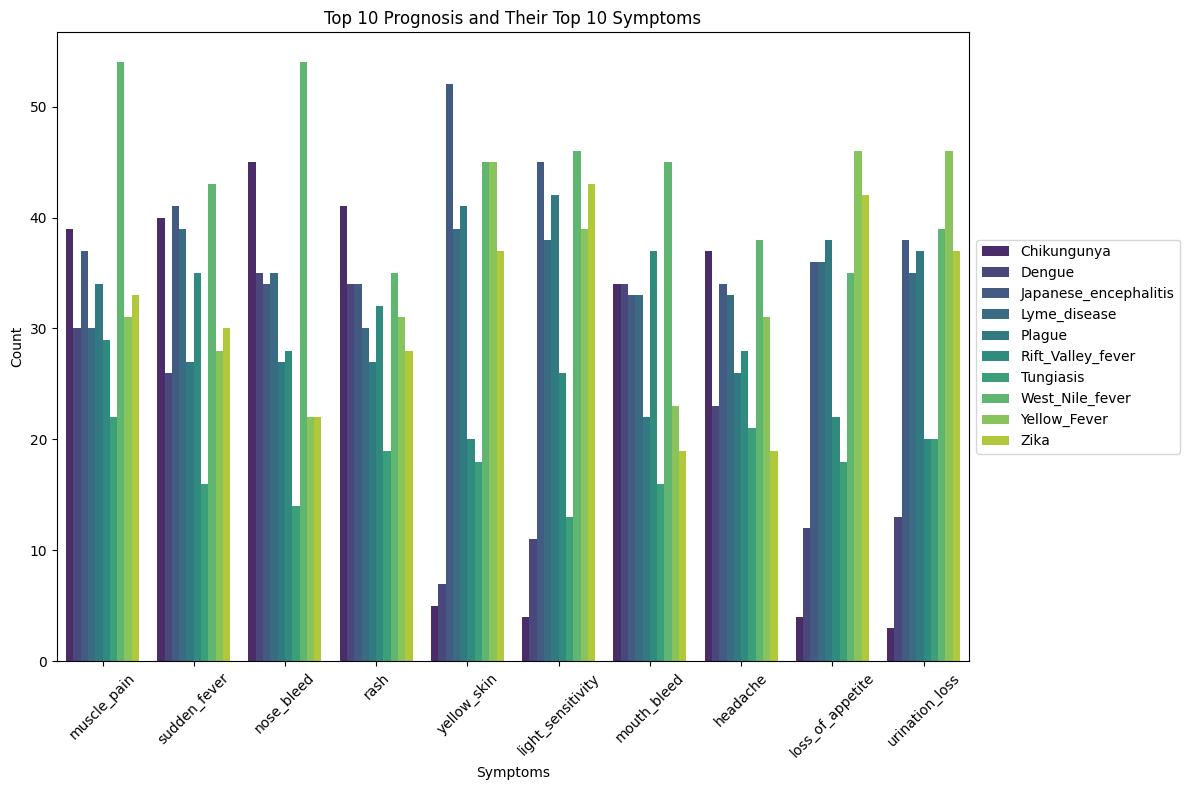

In [10]:
# Selecting the top 10 most frequent prognosis
top_10_prognosis = data['prognosis'].value_counts().head(10).index.tolist()

# Filtering data for the top 10 prognosis
top_10_data = data[data['prognosis'].isin(top_10_prognosis)]

# Selecting the top 10 most frequent symptoms for each prognosis
top_10_symptoms = top_10_data.drop(['id', 'prognosis'], axis=1).apply(lambda x: x.sum()).sort_values(ascending=False).head(10).index.tolist()

# Filtering data for the top 10 symptoms
top_10_data = top_10_data[['prognosis'] + top_10_symptoms]

# Grouping data by prognosis and summing up symptom occurrences
grouped_data = top_10_data.groupby('prognosis').sum()

# Plotting the top 10 prognosis and their top 10 symptoms using a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=grouped_data.reset_index().melt(id_vars='prognosis', var_name='Symptom', value_name='Count'),
            x='Symptom', y='Count', hue='prognosis', palette='viridis')
plt.title('Top 10 Prognosis and Their Top 10 Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Prognosis')
# Add legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Dimensionality Reduction

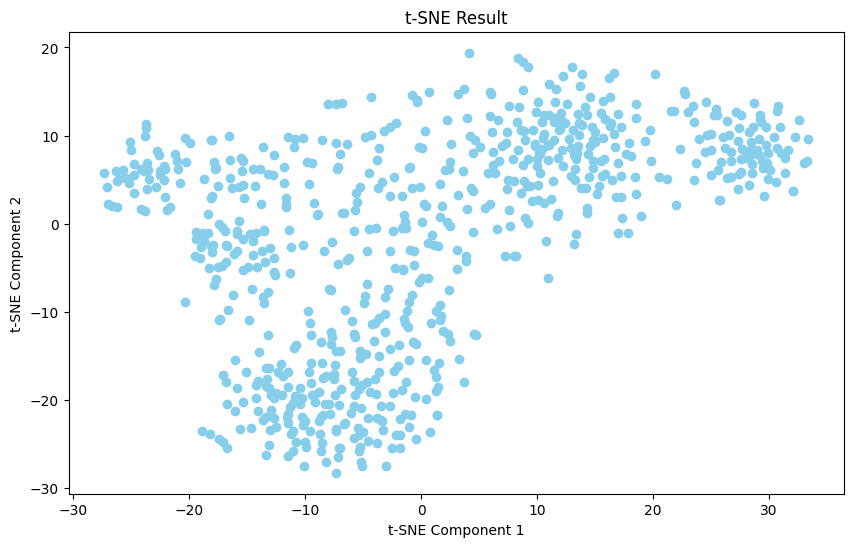

In [11]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(symptoms)

# Create a DataFrame for visualization
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])

# Plot t-SNE result
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['t-SNE1'], tsne_df['t-SNE2'], color='skyblue')
plt.title('t-SNE Result')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

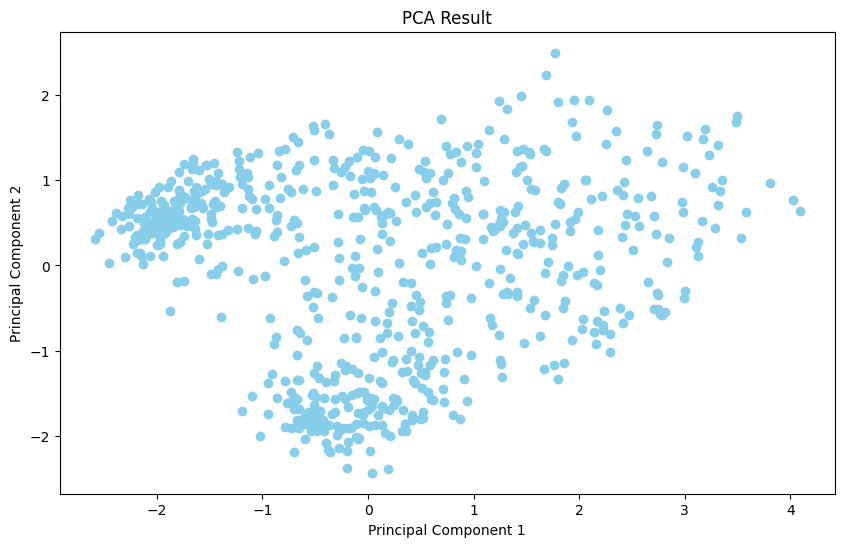

In [12]:
# Assuming 'data' is your DataFrame with symptoms as columns
symptoms = data.drop(['id', 'prognosis'], axis=1)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(symptoms)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot PCA result
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], color='skyblue')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Outlier Detection

Outliers found by Z-Score:
     sudden_fever  headache  mouth_bleed  nose_bleed  muscle_pain  joint_pain  \
2       -1.007097  1.106016     1.084152    1.024341    -1.036009    1.106016   
4       -1.007097 -0.904146    -0.922380   -0.976237    -1.036009   -0.904146   
5        0.992953  1.106016     1.084152    1.024341    -1.036009   -0.904146   
6        0.992953 -0.904146    -0.922380    1.024341     0.965243    1.106016   
18      -1.007097  1.106016    -0.922380   -0.976237     0.965243   -0.904146   
..            ...       ...          ...         ...          ...         ...   
674     -1.007097  1.106016    -0.922380   -0.976237    -1.036009    1.106016   
683     -1.007097  1.106016     1.084152    1.024341     0.965243    1.106016   
688      0.992953 -0.904146     1.084152    1.024341    -1.036009    1.106016   
701     -1.007097 -0.904146    -0.922380   -0.976237    -1.036009    1.106016   
705      0.992953  1.106016    -0.922380   -0.976237     0.965243   -0.904146   



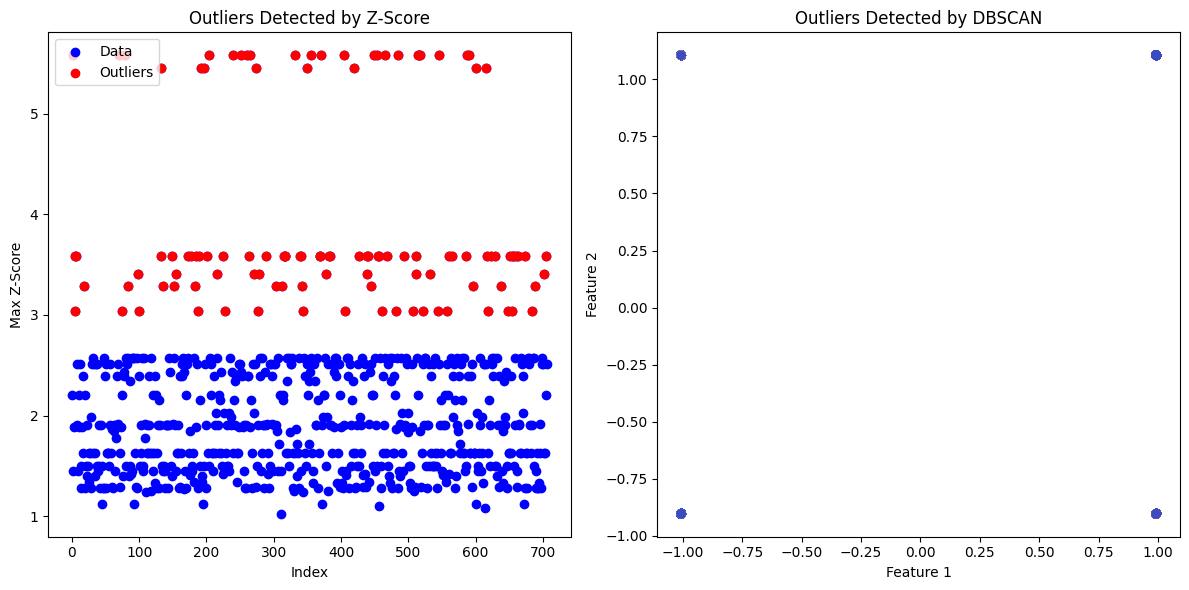

In [13]:
# Assuming 'data' is your DataFrame with symptoms as columns
symptoms = data.drop(['id', 'prognosis'], axis=1)

# Standardize the data
scaler = StandardScaler()
symptoms_scaled = scaler.fit_transform(symptoms)

# Outlier detection using Z-Score
z_scores = pd.DataFrame(symptoms_scaled, columns=symptoms.columns)
outliers_zscore = z_scores[(z_scores > 3).any(axis=1)]

# Outlier detection using DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2)
outliers_dbscan = dbscan.fit_predict(symptoms_scaled)

# Print outliers found by Z-Score
print("Outliers found by Z-Score:")
print(outliers_zscore)

# Print outliers found by DBSCAN
print("\nOutliers found by DBSCAN:")
print(outliers_dbscan)


# Plotting
plt.figure(figsize=(12, 6))

# Z-Score outliers
plt.subplot(1, 2, 1)
plt.scatter(z_scores.index, z_scores.max(axis=1), c='blue', label='Data')
plt.scatter(outliers_zscore.index, outliers_zscore.max(axis=1), c='red', label='Outliers')
plt.title('Outliers Detected by Z-Score')
plt.xlabel('Index')
plt.ylabel('Max Z-Score')
plt.legend()

# DBSCAN outliers
plt.subplot(1, 2, 2)
plt.scatter(symptoms_scaled[:, 0], symptoms_scaled[:, 1], c=outliers_dbscan, cmap='coolwarm')
plt.title('Outliers Detected by DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Class Imbalance

Class distribution before oversampling: Counter({'West_Nile_fever': 85, 'Japanese_encephalitis': 81, 'Tungiasis': 70, 'Rift_Valley_fever': 70, 'Chikungunya': 66, 'Dengue': 63, 'Yellow_Fever': 61, 'Zika': 58, 'Plague': 53, 'Lyme_disease': 52, 'Malaria': 48})
Class distribution after oversampling: Counter({'Lyme_disease': 85, 'Tungiasis': 85, 'Zika': 85, 'Rift_Valley_fever': 85, 'West_Nile_fever': 85, 'Malaria': 85, 'Chikungunya': 85, 'Plague': 85, 'Dengue': 85, 'Yellow_Fever': 85, 'Japanese_encephalitis': 85})


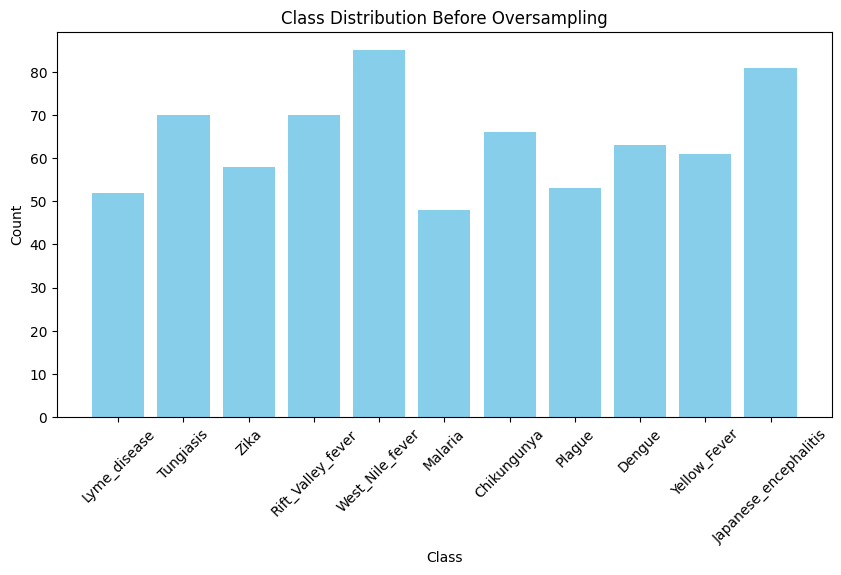

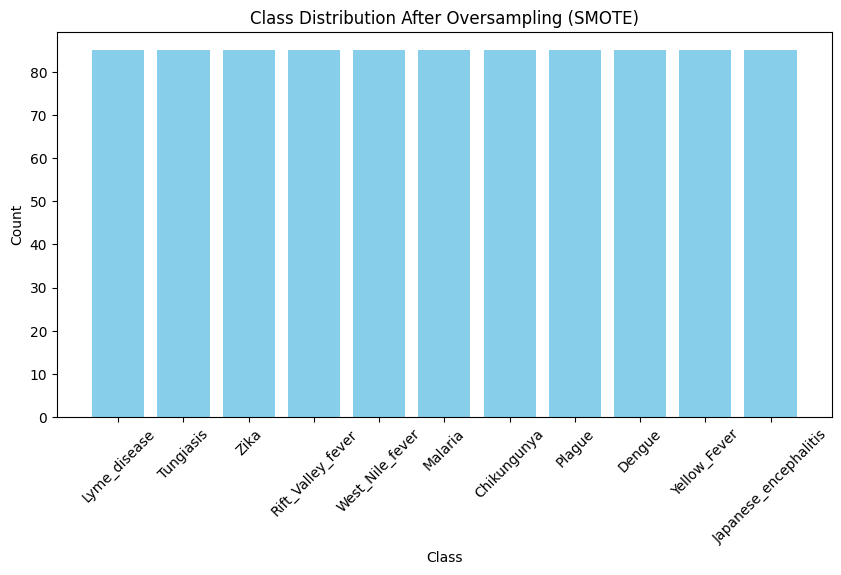

In [14]:
# Assuming 'data' is your DataFrame with symptoms as columns and 'prognosis' as the target variable
X = data.drop(['id', 'prognosis'], axis=1)
y = data['prognosis']

# Display class distribution before oversampling
print("Class distribution before oversampling:", Counter(y))

# Perform over-sampling using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

# Display class distribution before oversampling
class_distribution_before = Counter(y)
class_labels_before = list(class_distribution_before.keys())
class_counts_before = list(class_distribution_before.values())

plt.figure(figsize=(10, 5))
plt.bar(class_labels_before, class_counts_before, color='skyblue')
plt.title('Class Distribution Before Oversampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Display class distribution after oversampling
class_distribution_after = Counter(y_resampled)
class_labels_after = list(class_distribution_after.keys())
class_counts_after = list(class_distribution_after.values())

plt.figure(figsize=(10, 5))
plt.bar(class_labels_after, class_counts_after, color='skyblue')
plt.title('Class Distribution After Oversampling (SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()